In [1]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 20.6 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 9.4 MB/s  eta 0:00:01
     |████████████████████████████████| 3.1 MB 17.8 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 74.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:

pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 3.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install os

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


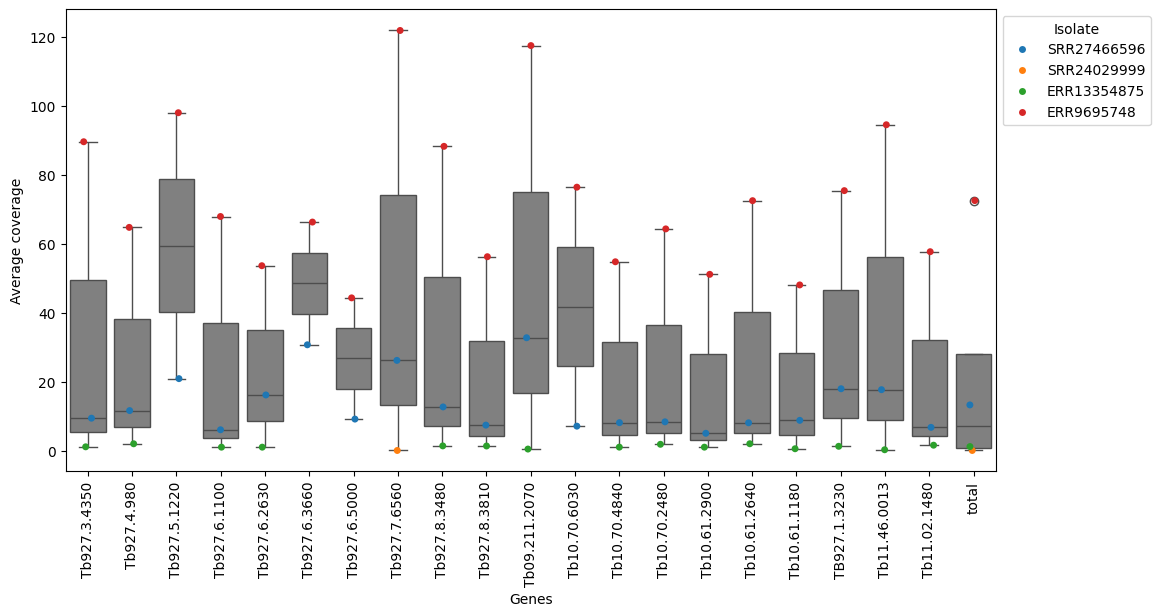

In [25]:
import os 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns 
import csv

# Define the directory containing the CSV files
csv_dir = '../Mosdepth/'
output_file = 'combined_data.csv'
 
# List to hold individual DataFrames
dataframes = []
 
# Iterate over each CSV file in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.endswith('.summary.txt'):
        file_path = os.path.join(csv_dir, csv_file)
       
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path, sep='\t')
       
        # Add a new column with the file name (without extension)
        df['source_file'] = os.path.splitext(csv_file)[0].split('.')[0]
       
        # Append the DataFrame to the list
        dataframes.append(df)
 
# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, axis=0)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(output_file, index=False, sep='\t', quoting=csv.QUOTE_NONE, escapechar=' ')

#print(f"Combined data saved to {output_file}")
#print(combined_df)
#sns.boxplot(x='chrom', y='mean', data=combined_df)

data_1 = pd.read_csv('combined_data.csv', sep='\t', usecols=['chrom', 'mean', 'source_file'])
plt.figure(figsize=(12,6))
sns.boxplot(x='chrom', y='mean', data=data_1, color='gray')
sns.stripplot(x='chrom', y='mean', data=data_1, hue='source_file', size=5, jitter=True, )
plt.xticks(rotation=90)
plt.xlabel('Genes')
plt.ylabel('Average coverage')
plt.legend(title="Isolate", bbox_to_anchor=(1, 1))
plt.show()



            chrom    mean
0    Tb927.3.4350   89.52
1     Tb927.4.980   64.70
2    Tb927.5.1220   97.93
3    Tb927.6.1100   67.85
4    Tb927.6.2630   53.59
5    Tb927.6.3660   66.24
6    Tb927.6.5000   44.27
7    Tb927.7.6560  121.77
8    Tb927.8.3480   88.19
9    Tb927.8.3810   56.20
10  Tb09.211.2070  117.39
11   Tb10.70.6030   76.35
12   Tb10.70.4840   54.73
13   Tb10.70.2480   64.26
14   Tb10.61.2900   51.09
15   Tb10.61.2640   72.44
16   Tb10.61.1180   48.02
17   TB927.1.3230   75.35
18   Tb11.46.0013   94.44
19   Tb11.02.1480   57.65
20          total   72.46


<Axes: xlabel='chrom', ylabel='mean'>

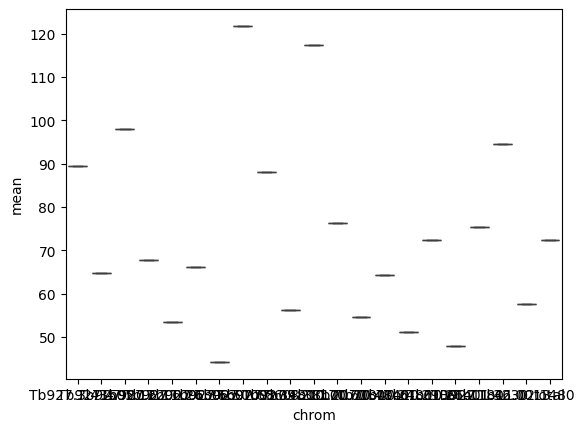

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns 
header=0, usecols=['chrom', 'mean'], sep='\t'
data = pd.read_csv('../Mosdepth/ERR9695748.mosdepth.summary.txt', )
print(data)
sns.boxplot(x='chrom', y='mean', data=data)
#y = data['mean']
#x = data['chrom']
#plt.boxplot(data)

#plt.xlabel('Genes')
#plt.ylabel('Coverage')
#plt.title('Coverage of each gene in sample ERR13354875')

df = (combined_df, header=0, usecols=['chrom', 'mean'], sep='\t')


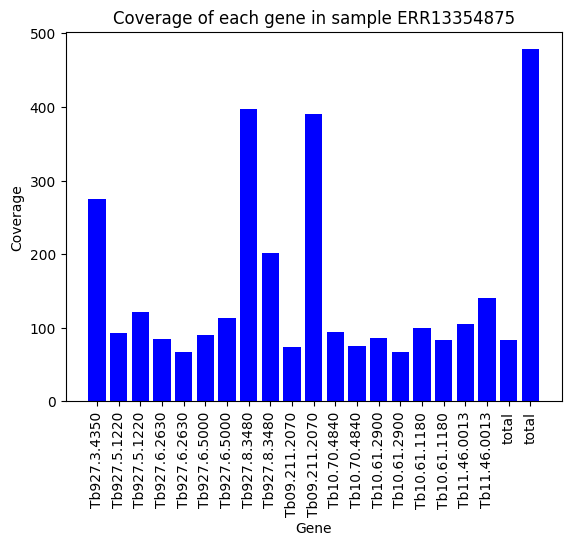

In [28]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

data = pd.read_csv('../Mosdepth/ERR9695748.mosdepth.global.dist.txt', header=None, sep='\t')
coverage = data[0]
range = (0,21)
bins = 21 
plt.hist(coverage, bins, range, color='blue', histtype = 'bar', rwidth = 0.8)
plt.xlabel('Gene')
plt.ylabel('Coverage')
plt.title('Coverage of each gene in sample ERR13354875')
plt.xticks(rotation=90)
current_ticks = np.array(plt.xticks()[0])
shifted_ticks = current_ticks + 0.5
plt.xticks(ticks=shifted_ticks)


plt.show()
